In [1]:
%load_ext autoreload
%autoreload 2
from src.data_interface import DataInterface
from src.analysis.base_tools import BaseTools
from src.analysis.ibex_coremark_tools import IbexCoremarkTools
from src.analysis.ibex_hwsec_coremark_tools import IbexHwsecCoremarkTools
from src.run_info.run_info import RunInfo

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.special import comb
from anytree.exporter import DotExporter


In [2]:
def visualization_setup():
    # Interactive plots. Requires tkinter on the machine running the code
    mpl.use("TkAgg")
    # Latex formatting for plots. Some visualizations might not work without this
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["mathtext.fontset"] = "dejavuserif"


runinfo = RunInfo("src/run_info/ibex_hwsec_coremark.ini")
data_interface = DataInterface(runinfo)

golden = data_interface.golden_log
node = data_interface.get_node_by_name("register_file_i")[0]
root = data_interface.root
node_data = data_interface.get_seu_log_by_node(node)
root_data = data_interface.get_seu_log_by_node(root)


node_runs = list(node_data.index)

Parsing SEU logs...


  7%|▋         | 7088/95049 [00:09<01:38, 890.89it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-11_23-43-23.426163/log.txt
  'utf-8' codec can't decode byte 0x94 in position 378: invalid start byte


 12%|█▏        | 11573/95049 [00:15<01:20, 1030.65it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_16-43-04.760083/log.txt
  'utf-8' codec can't decode byte 0xf5 in position 983: invalid start byte


 16%|█▋        | 15670/95049 [00:20<01:18, 1013.69it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_16-02-11.456015/log.txt
  'utf-8' codec can't decode byte 0x94 in position 378: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_15-44-20.415964/log.txt
  'utf-8' codec can't decode byte 0x82 in position 380: invalid start byte


 25%|██▌       | 24202/95049 [00:29<01:14, 951.17it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-13_05-49-21.538202/log.txt
  'utf-8' codec can't decode byte 0x94 in position 377: invalid start byte


 30%|███       | 28771/95049 [00:35<01:26, 767.53it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_13-37-08.164331/log.txt
  'utf-8' codec can't decode byte 0xf6 in position 1013: invalid start byte


 31%|███▏      | 29759/95049 [00:35<00:57, 1142.34it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-17_04-01-31.643275/log.txt
  'utf-8' codec can't decode byte 0xf7 in position 788: invalid start byte


 34%|███▎      | 32056/95049 [00:38<01:03, 998.54it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-12_20-59-35.927498/log.txt
  'utf-8' codec can't decode byte 0x94 in position 378: invalid start byte


 38%|███▊      | 36403/95049 [00:44<00:39, 1498.49it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-10_22-58-09.724469/log.txt
  'utf-8' codec can't decode byte 0xc0 in position 377: invalid start byte


 45%|████▌     | 43061/95049 [00:48<00:28, 1847.57it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-12_12-42-52.934018/log.txt
  'utf-8' codec can't decode byte 0xf6 in position 1247: invalid start byte


 47%|████▋     | 44575/95049 [00:49<00:30, 1644.63it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-20_00-58-22.436407/log.txt
  'utf-8' codec can't decode byte 0x94 in position 377: invalid start byte


 56%|█████▌    | 53420/95049 [00:56<00:22, 1881.36it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_20-05-12.403167/log.txt
  'utf-8' codec can't decode byte 0x82 in position 755: invalid start byte


 57%|█████▋    | 54215/95049 [00:56<00:23, 1739.79it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_23-13-59.113886/log.txt
  'utf-8' codec can't decode byte 0x80 in position 513: invalid start byte


 62%|██████▏   | 58635/95049 [00:59<00:15, 2316.17it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-11_06-12-56.606557/log.txt
  'utf-8' codec can't decode byte 0x80 in position 903: invalid start byte


 62%|██████▏   | 59147/95049 [00:59<00:17, 2021.81it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-11_00-49-14.619353/log.txt
  'utf-8' codec can't decode byte 0xf7 in position 1132: invalid start byte


 67%|██████▋   | 63585/95049 [01:01<00:14, 2100.04it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-12_12-00-30.676803/log.txt
  'utf-8' codec can't decode byte 0x94 in position 378: invalid start byte


 70%|██████▉   | 66424/95049 [01:03<00:15, 1810.98it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-12_02-17-13.857378/log.txt
  'utf-8' codec can't decode byte 0xd8 in position 1265: invalid continuation byte


 71%|███████   | 67683/95049 [01:04<00:13, 2085.13it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-12_01-38-19.915580/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 1171: invalid start byte


 72%|███████▏  | 68903/95049 [01:04<00:14, 1799.39it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_16-54-18.030870/log.txt
  'utf-8' codec can't decode byte 0x94 in position 377: invalid start byte


 80%|███████▉  | 75805/95049 [01:12<00:19, 981.00it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-18_08-00-13.198486/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 439: invalid start byte


 80%|████████  | 76121/95049 [01:13<00:15, 1231.91it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_00-26-42.077009/log.txt
  'utf-8' codec can't decode byte 0x82 in position 1103: invalid start byte


 84%|████████▍ | 79616/95049 [01:16<00:11, 1319.90it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-13_05-50-16.396437/log.txt
  'utf-8' codec can't decode byte 0x82 in position 1076: invalid start byte


 90%|█████████ | 85813/95049 [01:22<00:07, 1252.59it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-17_00-24-59.025273/log.txt
  'utf-8' codec can't decode byte 0x94 in position 378: invalid start byte


 95%|█████████▌| 90728/95049 [01:27<00:03, 1161.85it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-16_22-31-31.414226/log.txt
  'utf-8' codec can't decode byte 0x94 in position 377: invalid start byte


 96%|█████████▌| 90979/95049 [01:27<00:03, 1124.51it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_131123/seu_2023-11-19_15-36-53.276996/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 530: invalid start byte


100%|██████████| 95049/95049 [01:31<00:00, 1034.53it/s]


  Parsed 95003 logs, percent failed reads: 0.03%
Done parsing SEU logs
Building register tree
  58.66% of the register tree is unpopulated
Built register tree
Parsing SEU logs for optional data...


100%|██████████| 95046/95046 [01:32<00:00, 1032.95it/s]


Done parsing SEU logs for optional data


In [3]:
print(f"Number of entries on node_data: {len(node_data)}")
print(f"Number of entries on root_data: {len(root_data)}")

node_data.head()

Number of entries on node_data: 16804
Number of entries on root_data: 95003


,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,uvm_seed,seed_crc,list_crc,matrix_crc,state_crc,final_crc
seu_2023-11-18_20-44-33.097357,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,390598,13,8203f88000000032,8203d88000000032,1206530404[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-11-12_05-49-12.776667,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,436350,26,000000000000002a,040000000000002a,1945818813[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-11-12_16-51-13.077690,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,403703,6,8203f9080000000f,8203f9480000000f,1968948168[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-11-11_15-39-04.172628,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,257609,19,81005a5c0000003d,81085a5c0000003d,296297111[0m,NaN,NaN,NaN,NaN,NaN
seu_2023-11-18_06-27-53.040867,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,206719,35,8203f6ac0000000e,8203f6a40000000e,515650397[0m,NaN,NaN,NaN,NaN,NaN


/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:214: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:266: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_coremark_tools.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


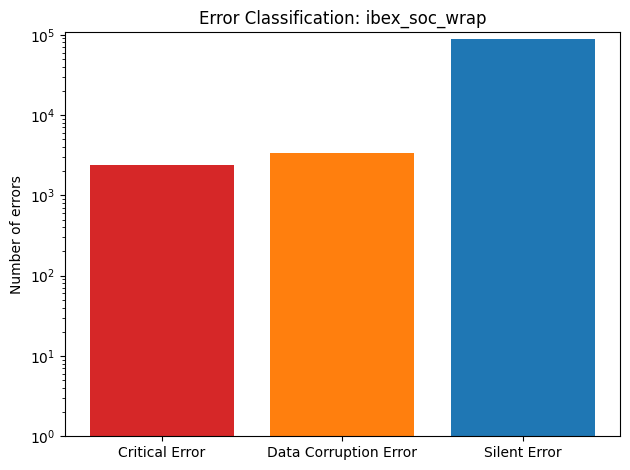

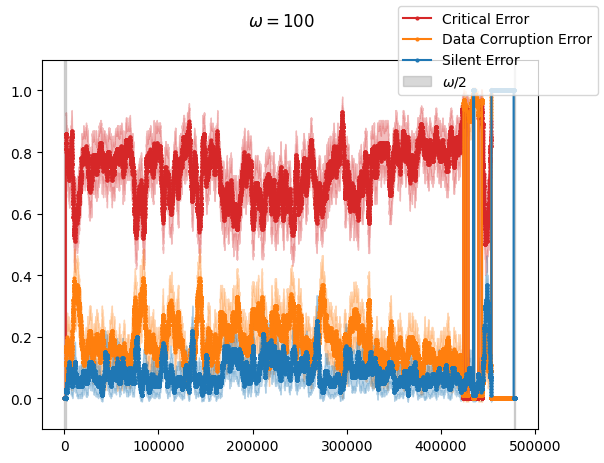

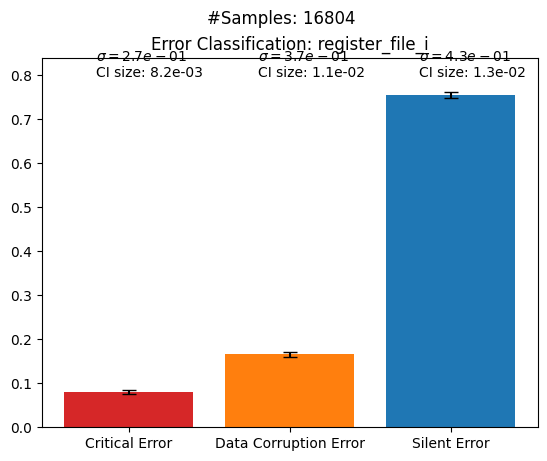

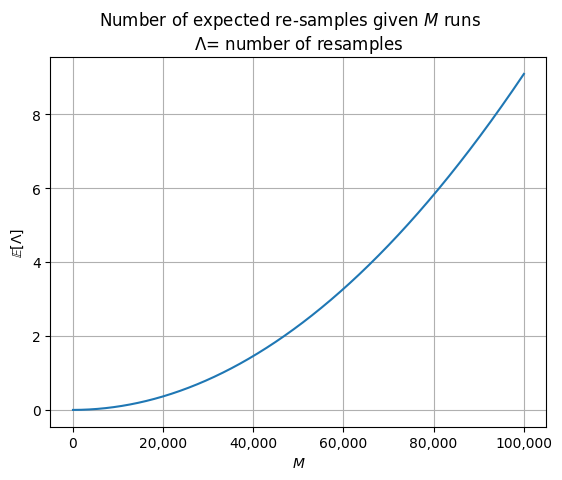

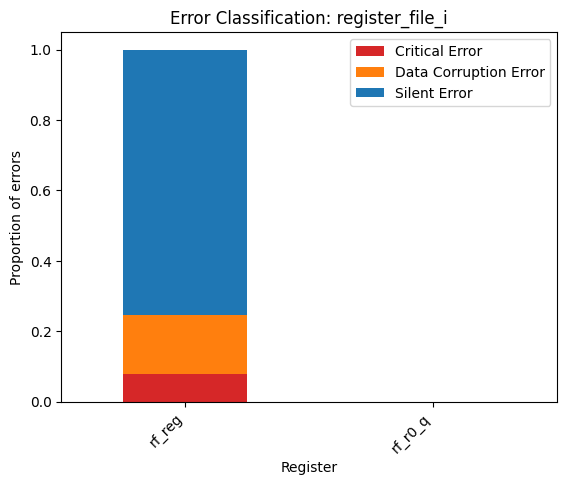

In [4]:

node_runs = list(node_data.index)

_ = BaseTools.error_classification(data_interface, root, visualize=True)

_ = BaseTools.windowed_error_rate(
    data_interface, node, "injection_cycle", visualize=True, window_size=100
)
_ = BaseTools.error_classification_confidence(data_interface, node, visualize=True)
_ = BaseTools.expected_num_multi_injection_runs(
    500_000, 2200, [100, 100_000], visualize=True
)

_ = IbexCoremarkTools.stacked_register_error_class(
    data_interface, node, visualize=True
)



/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:100: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  


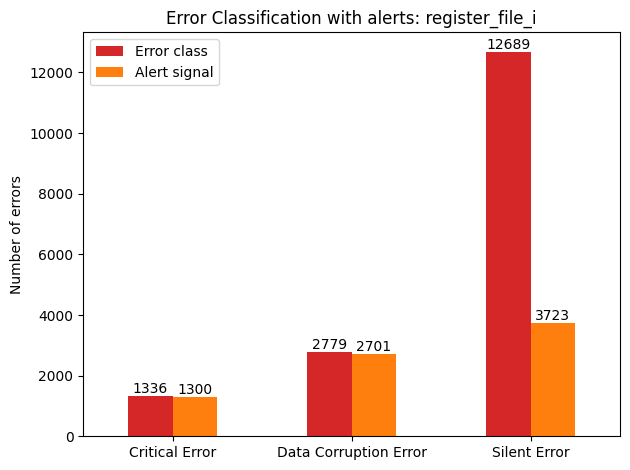

In [8]:
_ = IbexHwsecCoremarkTools.alert_classification(
    data_interface, node, visualize=True
)